<a href="https://colab.research.google.com/github/luck058/kaggle-gold-price-analysis/blob/model-1/model_1_kaggle_gold_price_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [282]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [283]:
!git clone https://github.com/luck058/kaggle-gold-price-analysis

%cd kaggle-gold-price-analysis

Cloning into 'kaggle-gold-price-analysis'...
remote: Enumerating objects: 58, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 58 (delta 30), reused 20 (delta 6), pack-reused 0 (from 0)
Receiving objects: 100% (58/58), 1.28 MiB | 12.85 MiB/s, done.
Resolving deltas: 100% (30/30), done.
/content/kaggle-gold-price-analysis/kaggle-gold-price-analysis/kaggle-gold-price-analysis/kaggle-gold-price-analysis/kaggle-gold-price-analysis/kaggle-gold-price-analysis/kaggle-gold-price-analysis/kaggle-gold-price-analysis/kaggle-gold-price-analysis/kaggle-gold-price-analysis/kaggle-gold-price-analysis/kaggle-gold-price-analysis/kaggle-gold-price-analysis/kaggle-gold-price-analysis


# Create X, y

In [284]:
df = pd.read_csv('financial_regression_cleaned.csv')

# Only care about sp500
original_cols = ['sp500 open', 'sp500 high', 'sp500 low', 'sp500 close', 'sp500 volume', 'sp500 high-low']
df = df[original_cols].reset_index(drop=True)

display(df.head())
print(df.shape)

,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low
0,114.49,115.14,114.42,114.93,115646960.0,0.72
1,114.73,114.84,113.20,113.64,212252769.0,1.64
2,113.62,115.13,113.59,115.06,138671890.0,1.54
3,114.28,114.45,112.98,113.89,216330645.0,1.47
4,113.92,114.27,111.56,111.70,344747028.0,2.71


(3719, 6)


In [285]:
df["sp500 close diff"] = df["sp500 close"].diff()

display(df.head())
print(df.shape)

,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,sp500 close diff
0,114.49,115.14,114.42,114.93,115646960.0,0.72,NaN
1,114.73,114.84,113.20,113.64,212252769.0,1.64,-1.29
2,113.62,115.13,113.59,115.06,138671890.0,1.54,1.42
3,114.28,114.45,112.98,113.89,216330645.0,1.47,-1.17
4,113.92,114.27,111.56,111.70,344747028.0,2.71,-2.19


(3719, 7)


In [286]:
def create_lag(df, column, lookback):
    assert column in df.columns
    for lag in range(1, lookback):
        if np.log2(lag) % 1 == 0:
            df[f'{column}-{lag}'] = df[column].shift(lag)

In [287]:
# create_lag(df, 'sp500 close diff', 10)
create_lag(df, 'sp500 close', 10)
display(df.head())

,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,sp500 close diff,sp500 close-1,sp500 close-2,sp500 close-4,sp500 close-8
0,114.49,115.14,114.42,114.93,115646960.0,0.72,NaN,NaN,NaN,NaN,NaN
1,114.73,114.84,113.20,113.64,212252769.0,1.64,-1.29,114.93,NaN,NaN,NaN
2,113.62,115.13,113.59,115.06,138671890.0,1.54,1.42,113.64,114.93,NaN,NaN
3,114.28,114.45,112.98,113.89,216330645.0,1.47,-1.17,115.06,113.64,NaN,NaN
4,113.92,114.27,111.56,111.70,344747028.0,2.71,-2.19,113.89,115.06,114.93,NaN


In [288]:
def get_max(df, column, lookback, name_append=None):
    assert column in df.columns
    df[f'{column}-max{name_append}'] = df[column].rolling(lookback).max()

In [289]:
def get_min(df, column, lookback, name_append=None):
    assert column in df.columns
    df[f'{column}-min{name_append}'] = df[column].rolling(lookback).min()

In [290]:
def get_min_max(df, column, lookback, name_append=None):
    assert column in df.columns
    get_max(df, column, lookback, name_append=name_append)
    get_min(df, column, lookback, name_append=name_append)

In [291]:
for column in original_cols + ["sp500 close diff"]:
    get_min_max(df, column, 5, "-short")


In [292]:
for column in original_cols + ["sp500 close diff"]:
    get_min_max(df, column, 20, "-long")


In [293]:
def get_mean(df, column, lookback, name_append=None):
    assert column in df.columns
    df[f'{column}-mean{name_append}'] = df[column].rolling(lookback).mean()

In [294]:
for column in original_cols + ["sp500 close diff"]:
    get_min_max(df, column, 5, "-short")

In [295]:
for column in original_cols + ["sp500 close diff"]:
    get_min_max(df, column, 20, "-long")

## Create y

In [296]:
y_col = "sp500 close diff"
y_col = "sp500 close"

df[y_col] = df[y_col].shift(-1)
df = df.dropna(axis=0).reset_index(drop=True)

display(df.head())

,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,sp500 close diff,sp500 close-1,sp500 close-2,sp500 close-4,...,sp500 low-max-long,sp500 low-min-long,sp500 close-max-long,sp500 close-min-long,sp500 volume-max-long,sp500 volume-min-long,sp500 high-low-max-long,sp500 high-low-min-long,sp500 close diff-max-long,sp500 close diff-min-long
0,106.99,108.10,106.51,109.74,304335521.0,1.59,-0.09,108.13,107.01,105.89,...,113.59,104.58,115.06,105.89,493483874.0,138671890.0,2.71,0.97,1.67,-3.39
1,108.86,109.85,107.82,110.26,159025359.0,2.03,1.70,108.04,108.13,107.22,...,113.59,104.58,115.06,105.89,493483874.0,138671890.0,2.71,0.97,1.70,-3.39
2,110.27,110.41,109.74,110.91,168609976.0,0.67,0.52,109.74,108.04,107.01,...,112.98,104.58,113.89,105.89,493483874.0,159025359.0,2.71,0.67,1.70,-3.39
3,110.08,111.14,110.04,111.14,192806015.0,1.10,0.65,110.26,109.74,108.13,...,111.56,104.58,111.70,105.89,493483874.0,159025359.0,2.71,0.67,1.70,-3.39
4,110.62,111.57,110.36,111.16,215567204.0,1.21,0.23,110.91,110.26,108.04,...,110.36,104.58,111.14,105.89,493483874.0,159025359.0,2.65,0.67,1.70,-3.39


In [297]:
y = df[y_col]
X = df.drop(y_col, axis=1)

print("y:")
display(pd.Series(y).head())
print("X:")
display(X.head())

print("len(y):")
print(len(y))
print("X.shape:")
print(X.shape)

y:


,sp500 close
0,109.74
1,110.26
2,110.91
3,111.14
4,111.16


X:


,sp500 open,sp500 high,sp500 low,sp500 volume,sp500 high-low,sp500 close diff,sp500 close-1,sp500 close-2,sp500 close-4,sp500 close-8,...,sp500 low-max-long,sp500 low-min-long,sp500 close-max-long,sp500 close-min-long,sp500 volume-max-long,sp500 volume-min-long,sp500 high-low-max-long,sp500 high-low-min-long,sp500 close diff-max-long,sp500 close diff-min-long
0,106.99,108.10,106.51,304335521.0,1.59,-0.09,108.13,107.01,105.89,110.38,...,113.59,104.58,115.06,105.89,493483874.0,138671890.0,2.71,0.97,1.67,-3.39
1,108.86,109.85,107.82,159025359.0,2.03,1.70,108.04,108.13,107.22,109.83,...,113.59,104.58,115.06,105.89,493483874.0,138671890.0,2.71,0.97,1.70,-3.39
2,110.27,110.41,109.74,168609976.0,0.67,0.52,109.74,108.04,107.01,106.44,...,112.98,104.58,113.89,105.89,493483874.0,159025359.0,2.71,0.67,1.70,-3.39
3,110.08,111.14,110.04,192806015.0,1.10,0.65,110.26,109.74,108.13,106.66,...,111.56,104.58,111.70,105.89,493483874.0,159025359.0,2.71,0.67,1.70,-3.39
4,110.62,111.57,110.36,215567204.0,1.21,0.23,110.91,110.26,108.04,105.89,...,110.36,104.58,111.14,105.89,493483874.0,159025359.0,2.65,0.67,1.70,-3.39


len(y):
3698
X.shape:
(3698, 38)


# Models

In [298]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import cross_validate


X_train.shape: (3328, 38)
X_test.shape: (370, 38)
y_train.shape: (3328,)
y_test.shape: (370,)
y_class_train.shape: (3328,)
y_class_test.shape: (370,)


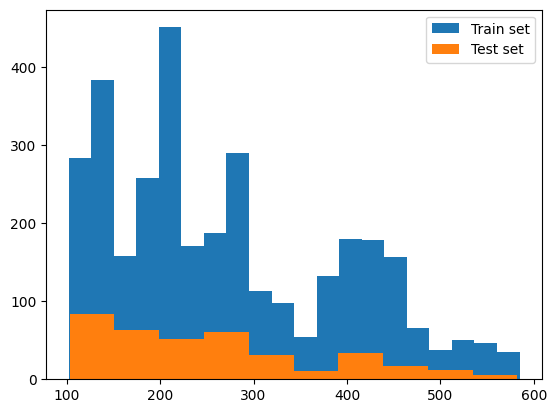

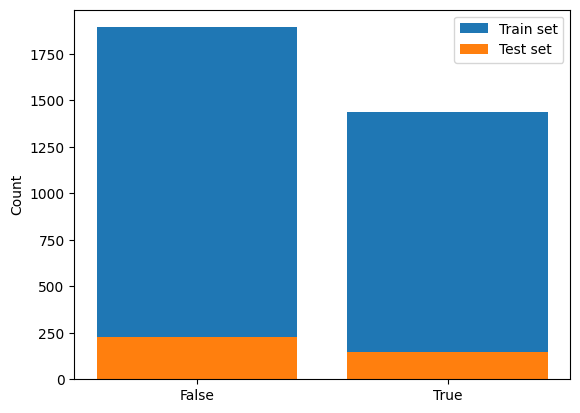

In [299]:
np.random.seed(1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
y_class_train = y_train > y_train.mean()
y_class_test = y_test > y_train.mean()

scaler = StandardScaler()
X_train_normalized = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_normalized = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

print("X_train.shape:", X_train.shape)
print("X_test.shape:", X_test.shape)
print("y_train.shape:", y_train.shape)
print("y_test.shape:", y_test.shape)
print("y_class_train.shape:", y_class_train.shape)
print("y_class_test.shape:", y_class_test.shape)

plt.hist(y_train, bins=20, label="Train set")
plt.hist(y_test, bins=10, label="Test set")
plt.legend()
plt.show()

plt.bar([0, 1], [len(y_class_train) - y_class_train.sum(), y_class_train.sum()], label="Train set")
plt.bar([0, 1], [len(y_class_test) - y_class_test.sum(), y_class_test.sum()], label="Test set")
plt.xticks([0, 1], ["False", "True"])
plt.ylabel("Count")
plt.legend()
plt.show()

In [300]:
class PredictZero:
    """Model which just predicts y as 0 irrespective of X"""
    def fit(self, X, y):
        pass

    def predict(self, X):
        return np.zeros(len(X))

    def score(self, X, y):
        y_pred = self.predict(X)
        return r2_score(y, y_pred)

    def get_params(self, deep=True):
        return {}

In [301]:
class PredictOne:
    """Model which just predicts y as 0 irrespective of X"""
    def fit(self, X, y):
        pass

    def predict(self, X):
        return np.ones(len(X))

    def score(self, X, y):
        y_pred = self.predict(X)
        return r2_score(y, y_pred)

    def get_params(self, deep=True):
        return {}

In [311]:
class PredictPrevious:
    """Model which just predicts y as 0 irrespective of X"""
    def fit(self, X, y):
        pass

    def predict(self, X):
        return X["sp500 close-1"]

    def score(self, X, y):
        y_pred = self.predict(X)
        return r2_score(y, y_pred)

    def get_params(self, deep=True):
        return {}

In [312]:
class PredictMean:
    """Model which just predicts y as the mean of y in the training set irrespective of X"""
    def fit(self, X, y):
        self.mean_y = np.mean(y)

    def predict(self, X):
        return np.full(len(X), self.mean_y)

    def score(self, X, y):
        y_pred = self.predict(X)
        return r2_score(y, y_pred)

    def get_params(self, deep=True):
        return {}

In [313]:
# ! pip install ISLP

In [314]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from ISLP.bart import BART
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPRegressor



In [321]:
def evaluate_model(model, X_train, y_train, other_scoring=[], return_estimator=False):
    cv_results = cross_validate(model, X_train, y_train, scoring=["r2", "neg_mean_squared_error"]+other_scoring, cv=10, return_estimator=return_estimator)
    print(f"R2: {print_cv_results(cv_results['test_r2'])}")
    print(f"MSE: {print_cv_results(cv_results['test_neg_mean_squared_error'] * (-1))}")
    for scoring in other_scoring:
        print(f"{scoring}: {print_cv_results(cv_results[f'test_{scoring}'])}")
    print()
    return cv_results

In [322]:
def print_cv_results(results, z=1.96):
    """Prints the mean with confidence intervals (z-score can be modified, default 95% confidence)"""
    mean = np.mean(results)
    std_err = np.std(results) / np.sqrt(len(results))
    return f"{round(mean, 2)} " + u"\u00B1" + f"{round(z * std_err, 2)}"

In [ ]:
print(f"Model: PredictZero")
evaluate_model(PredictZero(), X_train, y_train)

print(f"Model: PredictMean")
evaluate_model(PredictMean(), X_train, y_train)

print(f"Model: PredictPrevious")
evaluate_model(PredictPrevious(), X_train, y_train)

In [357]:
print(f"Model: LinearRegression")
linear_regression = evaluate_model(LinearRegression(), X_train, y_train, return_estimator=True)
display(pd.DataFrame(zip(X.columns, linear_regression["estimator"][0].coef_.round(3))).sort_values(by=1))

Model: LinearRegression
R2: 1.0 ±0.0
MSE: 10.05 ±1.02



,0,1
10,sp500 open-max-short,-0.342
28,sp500 low-max-long,-0.271
16,sp500 close-max-short,-0.266
0,sp500 open,-0.172
31,sp500 close-min-long,-0.093
11,sp500 open-min-short,-0.065
25,sp500 open-min-long,-0.064
34,sp500 high-low-max-long,-0.062
20,sp500 high-low-max-short,-0.048
17,sp500 close-min-short,-0.046


In [356]:
print(f"Model: Ridge")
evaluate_model(Ridge(alpha=0.1), X_train_normalized, y_train)
display(pd.DataFrame(zip(X.columns, linear_regression["estimator"][0].coef_.round(3))).sort_values(by=1))

Model: Ridge
R2: 1.0 ±0.0
MSE: 9.98 ±1.04



,0,1
10,sp500 open-max-short,-0.342
28,sp500 low-max-long,-0.271
16,sp500 close-max-short,-0.266
0,sp500 open,-0.172
31,sp500 close-min-long,-0.093
11,sp500 open-min-short,-0.065
25,sp500 open-min-long,-0.064
34,sp500 high-low-max-long,-0.062
20,sp500 high-low-max-short,-0.048
17,sp500 close-min-short,-0.046


In [359]:
print(f"Model: Lasso")
evaluate_model(Lasso(alpha=1, max_iter=4000), X_train_normalized, y_train)
display(pd.DataFrame(zip(X.columns, linear_regression["estimator"][0].coef_.round(3))).sort_values(by=1))

Model: Lasso
R2: 1.0 ±0.0
MSE: 12.77 ±1.4



,0,1
10,sp500 open-max-short,-0.342
28,sp500 low-max-long,-0.271
16,sp500 close-max-short,-0.266
0,sp500 open,-0.172
31,sp500 close-min-long,-0.093
11,sp500 open-min-short,-0.065
25,sp500 open-min-long,-0.064
34,sp500 high-low-max-long,-0.062
20,sp500 high-low-max-short,-0.048
17,sp500 close-min-short,-0.046


In [ ]:
print(f"Model: BART")
evaluate_model(BART(), X_train, y_train)
pass

In [360]:
print(f"Model: RandomForestRegressor")
# random_forest = RandomForestRegressor()
# grid_search = GridSearchCV(random_forest, param_grid={'n_estimators': [30, 100, 300]}, cv=3)
# grid_search.fit(X_train, y_train)
# best_n_estimators = grid_search.best_params_['n_estimators']
# print("best_n_estimators:", best_n_estimators)
best_n_estimators = 100
evaluate_model(RandomForestRegressor(n_estimators=best_n_estimators), X_train, y_train)


# print(f"Model: RegressionTree with Pruning")
# regressor = DecisionTreeRegressor()
# ccp_path = regressor.cost_complexity_pruning_path(X_train, y_train)
# ccp_path.alphas = ccp_path.ccp_alphas[::len(ccp_path.ccp_alphas)//4]
# grid_search = GridSearchCV(regressor, param_grid={'ccp_alpha': ccp_path.ccp_alphas}, cv=3)
# grid_search.fit(X_train, y_train)
# best_ccp_alpha = grid_search.best_params_['ccp_alpha']
# print("best_ccp_alpha:", best_ccp_alpha)
# evaluate_model(DecisionTreeRegressor(alpha=best_ccp_alpha), X_train, y_train)

# print(f"Model: MLPRegressor")
# evaluate_model(MLPRegressor(max_iter=1000, hidden_layer_sizes=(50,50,50)), X_train, y_train)


pass


Model: RandomForestRegressor


KeyboardInterrupt: 

In [338]:
# print(f"Model: Ridge")
# evaluate_model(Ridge(), X_train_normalized, y_train)

print(f"Model: Lasso")
evaluate_model(Lasso(max_iter=4000, alpha=10), X_train_normalized, y_train)

Model: Lasso
R2: 0.99 ±0.0
MSE: 111.88 ±6.19



{'fit_time': array([0.40387607, 0.36652756, 0.41581464, 0.2867763 , 0.31518197,
        0.28585029, 0.25040293, 0.20585227, 0.21478176, 0.20377851]),
 'score_time': array([0.00515747, 0.01192331, 0.00906849, 0.00934196, 0.01277447,
        0.01160121, 0.00414324, 0.00418282, 0.00418615, 0.00396085]),
 'test_r2': array([0.99248709, 0.99258803, 0.99325056, 0.9925771 , 0.9927932 ,
        0.99194103, 0.9924333 , 0.99205071, 0.99213214, 0.9920385 ]),
 'test_neg_mean_squared_error': array([-110.52891026, -109.76834915,  -95.14395247, -108.14797262,
        -106.85227883, -119.41619162,  -99.79258669, -124.21417846,
        -115.63628596, -129.2502873 ])}

In [330]:
display(pd.DataFrame(zip(X.columns, linear_regression["estimator"][0].coef_.round(3))))

,0,1
0,sp500 open,-0.172
1,sp500 high,0.128
2,sp500 low,0.167
3,sp500 volume,-0.000
4,sp500 high-low,-0.038
5,sp500 close diff,0.748
6,sp500 close-1,0.894
7,sp500 close-2,-0.041
8,sp500 close-4,0.083
9,sp500 close-8,0.044


In [309]:
# print(f"Model: MLPRegressor")
# evaluate_model(MLPRegressor(max_iter=2000, hidden_layer_sizes=(100,100,100)), X_train, y_train)

Model: MLPRegressor


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


R2: -625984.75 ±373002.39
MSE: 9165085092.74 ±5467417046.82



{'fit_time': array([ 9.72812057,  6.15669966,  4.56944489, 11.10280418,  9.7797482 ,
         2.97009873,  3.49492168,  4.32023144, 12.72461891,  7.63092208]),
 'score_time': array([0.00911188, 0.00609279, 0.00618434, 0.00651956, 0.00602078,
        0.00606012, 0.00588107, 0.0167923 , 0.01357007, 0.00654888]),
 'test_r2': array([ -549533.21645828, -2319798.25124298,  -210967.91166708,
         -398622.8843835 ,  -304484.69257578,  -569984.52224356,
         -962072.36066034,  -328091.46053033,  -228551.57741623,
         -387740.60454677]),
 'test_neg_mean_squared_error': array([-8.08466903e+09, -3.43552944e+10, -2.97393609e+09, -5.80775078e+09,
        -4.51448507e+09, -8.44593506e+09, -1.26882029e+10, -5.12671290e+09,
        -3.35910754e+09, -6.29475726e+09])}

In [310]:
print(f"Model: PredictZero")
evaluate_model(PredictZero(), X_train, y_class_train, other_scoring=["accuracy"])

print(f"Model: PredictOne")
evaluate_model(PredictOne(), X_train, y_class_train, other_scoring=["accuracy"])

print(f"Model: LogisticRegression")
evaluate_model(LogisticRegression(), X_train, y_class_train, other_scoring=["accuracy"])

print(f"Model: LinearDiscriminantAnalysis")
evaluate_model(LogisticRegression(), X_train, y_class_train, other_scoring=["accuracy"])

print(f"Model: QuadraticDiscriminantAnalysis")
evaluate_model(LogisticRegression(), X_train, y_class_train, other_scoring=["accuracy"])


pass

Model: PredictZero
R2: -0.76 ±0.04
MSE: 0.43 ±0.01
accuracy: 0.57 ±0.01

Model: PredictOne
R2: -1.33 ±0.07
MSE: 0.57 ±0.01
accuracy: 0.43 ±0.01

Model: LogisticRegression


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

R2: 0.64 ±0.05
MSE: 0.09 ±0.01
accuracy: 0.91 ±0.01

Model: LinearDiscriminantAnalysis


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

R2: 0.64 ±0.05
MSE: 0.09 ±0.01
accuracy: 0.91 ±0.01

Model: QuadraticDiscriminantAnalysis


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

R2: 0.64 ±0.05
MSE: 0.09 ±0.01
accuracy: 0.91 ±0.01



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c